Importing all needed libraries, tensor flow for initializing weights,keras for dataset , numpy for calculations,matplotlib for plotting

In [161]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Loads MNIST dataset and X_train_full is images for training(60000), Y_train_full is label for training(0-9), x_test is for training 10000 images, y_test is labels for training

In [162]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [163]:
X_train_full.shape        # defines for the shape of 60000 dataset of 28x28 

(60000, 28, 28)

In [164]:
X_train_full.dtype       # unsigned integer uint8 uses 8 bits (1 byte memory)

dtype('uint8')

In [165]:
X_valid,X_train = X_train_full[:5000]/255.0 ,X_train_full[5000:]/255.0         # converting unit to float(0-255)
y_valid,y_train = y_train_full[:5000] ,y_train_full[5000:]
X_test = X_test/255.0                                                          # converting unit to float(0-255)

In [166]:
# for i in y_train:
#     print(i)

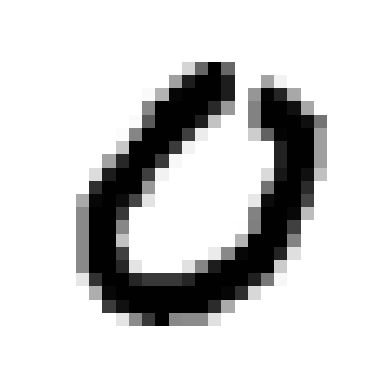

In [167]:
plt.imshow(X_train[7],cmap='binary')
plt.axis('off')
plt.show()

Defining the classes for digits(0-9) in a order

In [168]:
class_names = [0,1,2,3,4,5,6,7,8,9]

Checking whether the given order is  correct or not

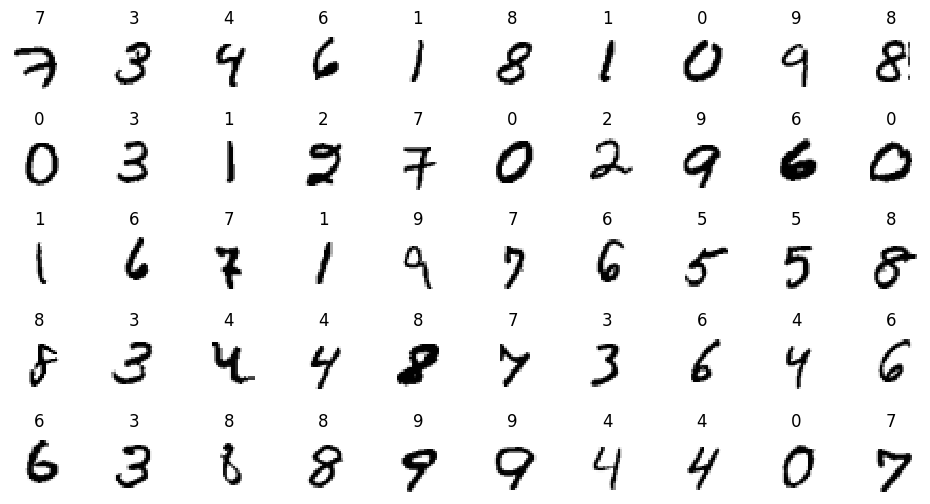

In [176]:
n_rows = 5
n_col = 10
plt.figure(figsize=(n_col*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_col):
        index = row*n_col + col
        plt.subplot(n_rows,n_col,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [170]:
model = keras.models.Sequential()                   # creates a sequential model where layers are added sequentially
model.add(keras.Input(shape=(28,28)))               # input images of size 28x28
model.add(keras.layers.Flatten())                   # flattens the 28x28 matrix as 1D vector of 784 inputs
model.add(keras.layers.Dense(300,activation='relu'))    # creates of 300 neurons and a non-linear layers for complex features
model.add(keras.layers.Dense(100,activation='relu'))    # creates of 100 neurons and a non-linear layers
model.add(keras.layers.Dense(10,activation='softmax'))  # 10 neurons one for each digit(0-9) and probabilities sums up to 1

In [171]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [172]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [173]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [174]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [177]:
history = model.fit(X_train,y_train,epochs=3,
                    validation_data=(X_valid,y_valid))

Epoch 1/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8062 - loss: 0.8487 - val_accuracy: 0.9176 - val_loss: 0.2988
Epoch 2/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9142 - loss: 0.3005 - val_accuracy: 0.9346 - val_loss: 0.2347
Epoch 3/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9302 - loss: 0.2408 - val_accuracy: 0.9446 - val_loss: 0.1998


In [178]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [179]:
model.get_layer(hidden1.name) is hidden1

True

In [180]:
weights,biases = hidden1.get_weights()

In [181]:
weights

array([[ 0.07016858,  0.05113734, -0.05939302, ..., -0.00888796,
        -0.01149885, -0.06273138],
       [ 0.05886449, -0.04157205, -0.07427718, ...,  0.02943909,
         0.02099912, -0.03184179],
       [ 0.02222984, -0.03043199,  0.05061068, ...,  0.06412624,
         0.03260026, -0.00438537],
       ...,
       [-0.02452792, -0.00741702, -0.00158901, ..., -0.00367736,
         0.05763467,  0.07063106],
       [-0.03958344,  0.0367498 ,  0.05436422, ..., -0.05009631,
        -0.03374416, -0.00947913],
       [-0.06574859, -0.06878087, -0.06880417, ...,  0.0426622 ,
         0.00012383, -0.04152082]], dtype=float32)

In [182]:
biases.shape

(300,)

In [183]:
biases

array([ 8.32335558e-03,  6.22967212e-03, -3.94390197e-03, -1.36932859e-03,
        3.31447907e-02,  2.05179378e-02,  5.94636891e-03, -2.53181031e-04,
        7.90241174e-03,  4.70049446e-03, -5.26013668e-04,  1.25696771e-02,
       -5.19830175e-03,  6.24170108e-03, -1.10271352e-03,  1.69443022e-02,
        2.35899072e-02,  6.47804840e-03,  2.20826864e-02,  2.97572184e-03,
       -1.72204003e-02,  3.04340906e-02,  2.64336821e-02, -3.80612770e-03,
        4.40585148e-03,  4.44876626e-02, -6.93743443e-03,  1.41321113e-02,
        1.40826246e-02,  2.40916722e-02,  8.47583823e-03,  1.43842315e-02,
        3.04995924e-02,  7.96927698e-03, -1.65822532e-03, -6.52241695e-04,
        6.66513946e-03,  1.51785812e-03,  3.99116613e-02,  3.62714976e-02,
       -2.22189841e-03,  9.08870902e-03,  4.55657626e-03,  2.58052330e-02,
       -6.87347725e-04,  6.30225474e-03, -2.17573196e-02,  1.69513766e-02,
        2.68949550e-02,  2.27621337e-03,  7.45637435e-03,  1.67235024e-02,
       -2.28896923e-03, -

In [184]:
history.epoch

[0, 1, 2]

In [185]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

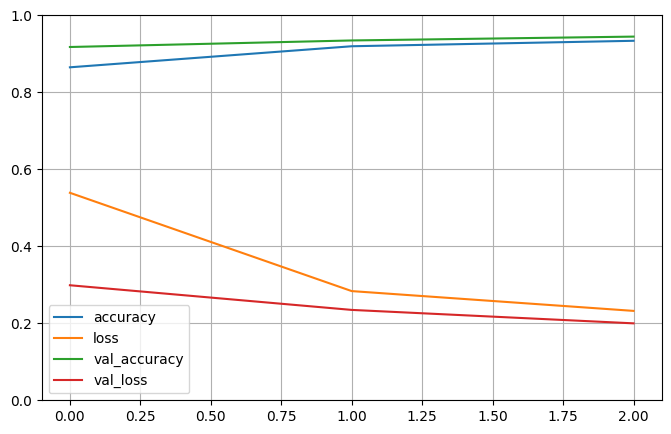

In [186]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [187]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.2407


[0.20579582452774048, 0.9427000284194946]

In [188]:
x_new = X_test[:10]

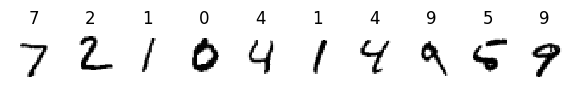

In [189]:
plt.figure(figsize=(7.2,6.2))
for index,image in enumerate(x_new):
        plt.subplot(1,10,index+1)
        plt.imshow(image,cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [190]:
y_pred = np.argmax(model.predict(x_new),axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [191]:
np.array(class_names)[y_pred]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

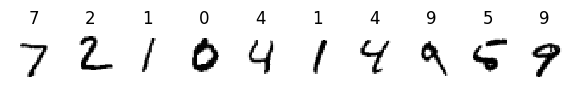

In [192]:
plt.figure(figsize=(7.2,6.2))
for index,image in enumerate(x_new):
        plt.subplot(1,10,index+1)
        plt.imshow(image,cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [ ]:
#model.save('handwritten_model.keras')

In [ ]:
import cv2
import numpy as np
from tensorflow import keras

def preprocess_and_predict(image_path, model):
    # Load as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))
    
    # Check if background is white (mean > 127), then invert
    if np.mean(img) > 127:
        img = 255 - img

    # Normalize
    img = img / 255.0

    # Reshape according to model input
    if len(model.input_shape) == 4:  # (None, 28, 28, 1)
        img = img.reshape(1, 28, 28, 1)
    else:  # (None, 28, 28)
        img = img.reshape(1, 28, 28)

    # Predict
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    print("Predicted probabilities:", prediction)
    print("Predicted digit:", predicted_label)
    return predicted_label


In [220]:
preprocess_and_predict("OIP 2.png",model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted probabilities: [[1.8775869e-04 6.2614276e-06 1.4454224e-05 4.7642365e-03 2.3951174e-05
  9.8884249e-01 2.7321657e-05 1.3763929e-06 5.3925314e-03 7.3961780e-04]]
Predicted digit: 5


5